### Business Question 1
> Employers would like to know the factors affecting employee attrition so that they could introduce measures to reduce attrition rates. <br>
### Research Approach
> Use Logistic Regression.<br>

### Business Question 2
> Employees would like to know the factors influencing their income since income is the main or one of the motivation for them to do any work or provide any service. <br>
### Research Approach
> Use Linear Regression.<br>

### Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# an instance of RcParams where the figure is sized to 20 x 20
rcParams['figure.figsize'] = 20, 20
# set seaborn themes to darkgrid
sns.set_style('darkgrid')

### Business Question 1 - Logistic Regression

In [3]:
# read from csv and create a dataframe
# view the first 5 lines
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# dataframe attributes
print(df.columns)
print('---------------')
print(df.shape)
print('---------------')
print(df.size)
print('---------------')
print(df.index)
print('---------------')
print(df.values)
print('---------------')

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
---------------
(1470, 35)
---------------
51450
---------------
RangeIndex(start=0, stop=1470, step=1)
---------------
[[41 'Yes' 'Travel_Rarely' ... 4 0 5]
 [49 'No' 'Travel_Frequently' ... 7 1 7]
 [37 'Yes' 'Travel_Rarely' ... 0 0 0]
 ...
 [27 'No' 'Travel_Rarely' ... 2 0 3]
 [49 'No' 

### Data Exploration & Cleaning

In [5]:
# obtain summary of the dataframe
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# check whether the columns have any missing values
print(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
# check whether the rows have any missing values
print(df.isnull().any(axis=1))

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool


In [8]:
# show all records info that has missing data
df[df.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [9]:
# find duplicated rows 
df.loc[df.duplicated(keep=False),:]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [10]:
# check unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
# drop columns with only 1 unique value 
df.drop(columns=['EmployeeCount','Over18','StandardHours'] , inplace=True)

In [12]:
# generate descriptive statistics for continuous variables
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# generate descriptive statistics for categrical variables
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


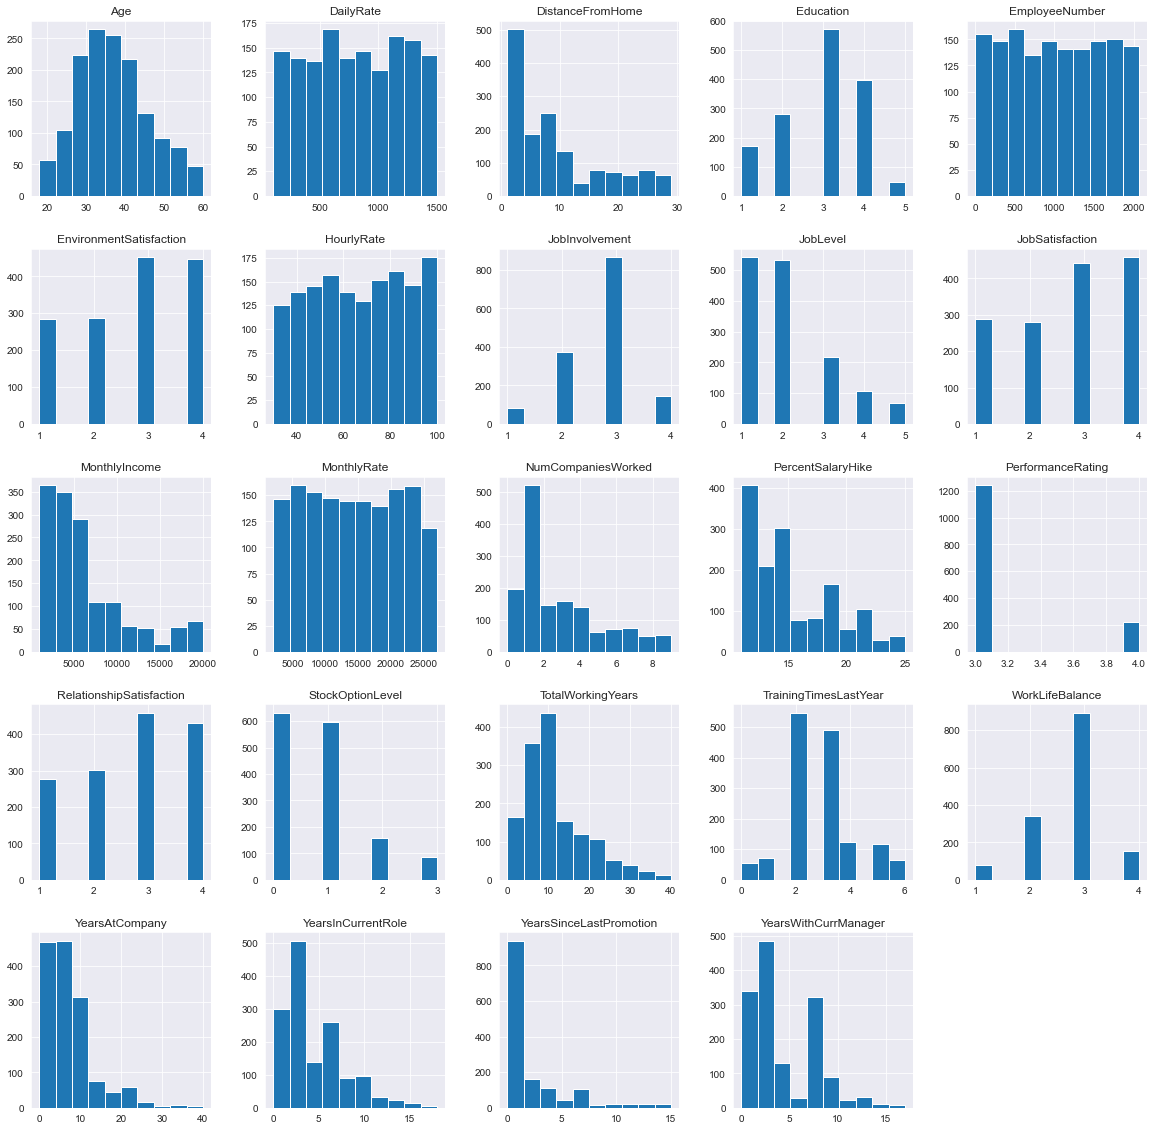

In [14]:
# plot a histogram for each variable 
df.hist()
plt.show()

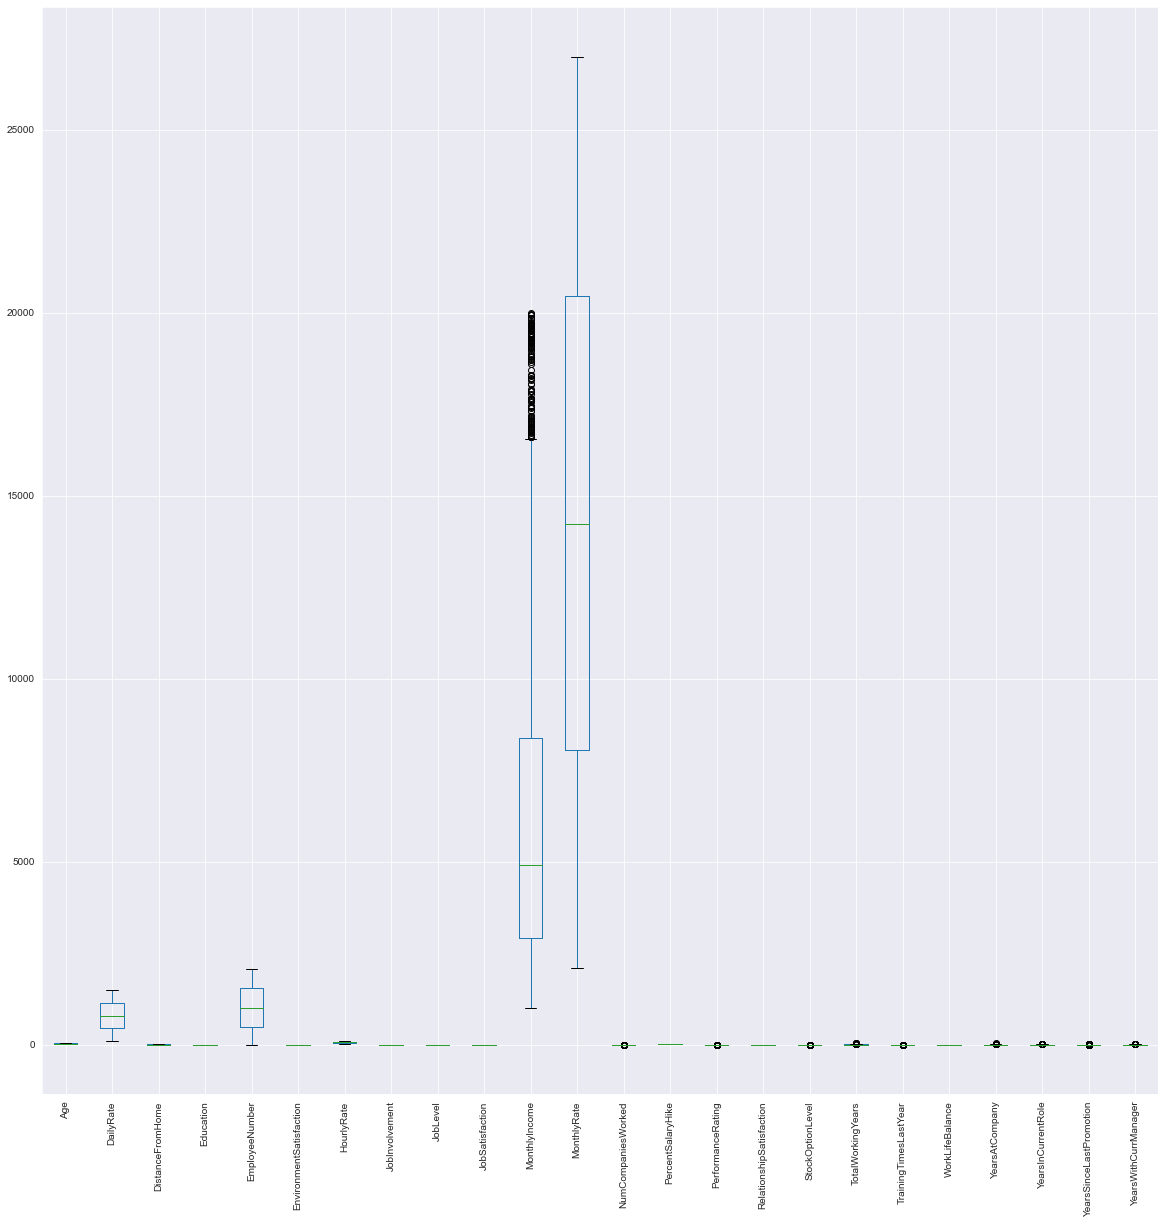

In [15]:
# plot a boxplot for each variable 
df.boxplot()
# rotate the x axis ticks by 90 degrees
plt.xticks(rotation=90)
plt.show()

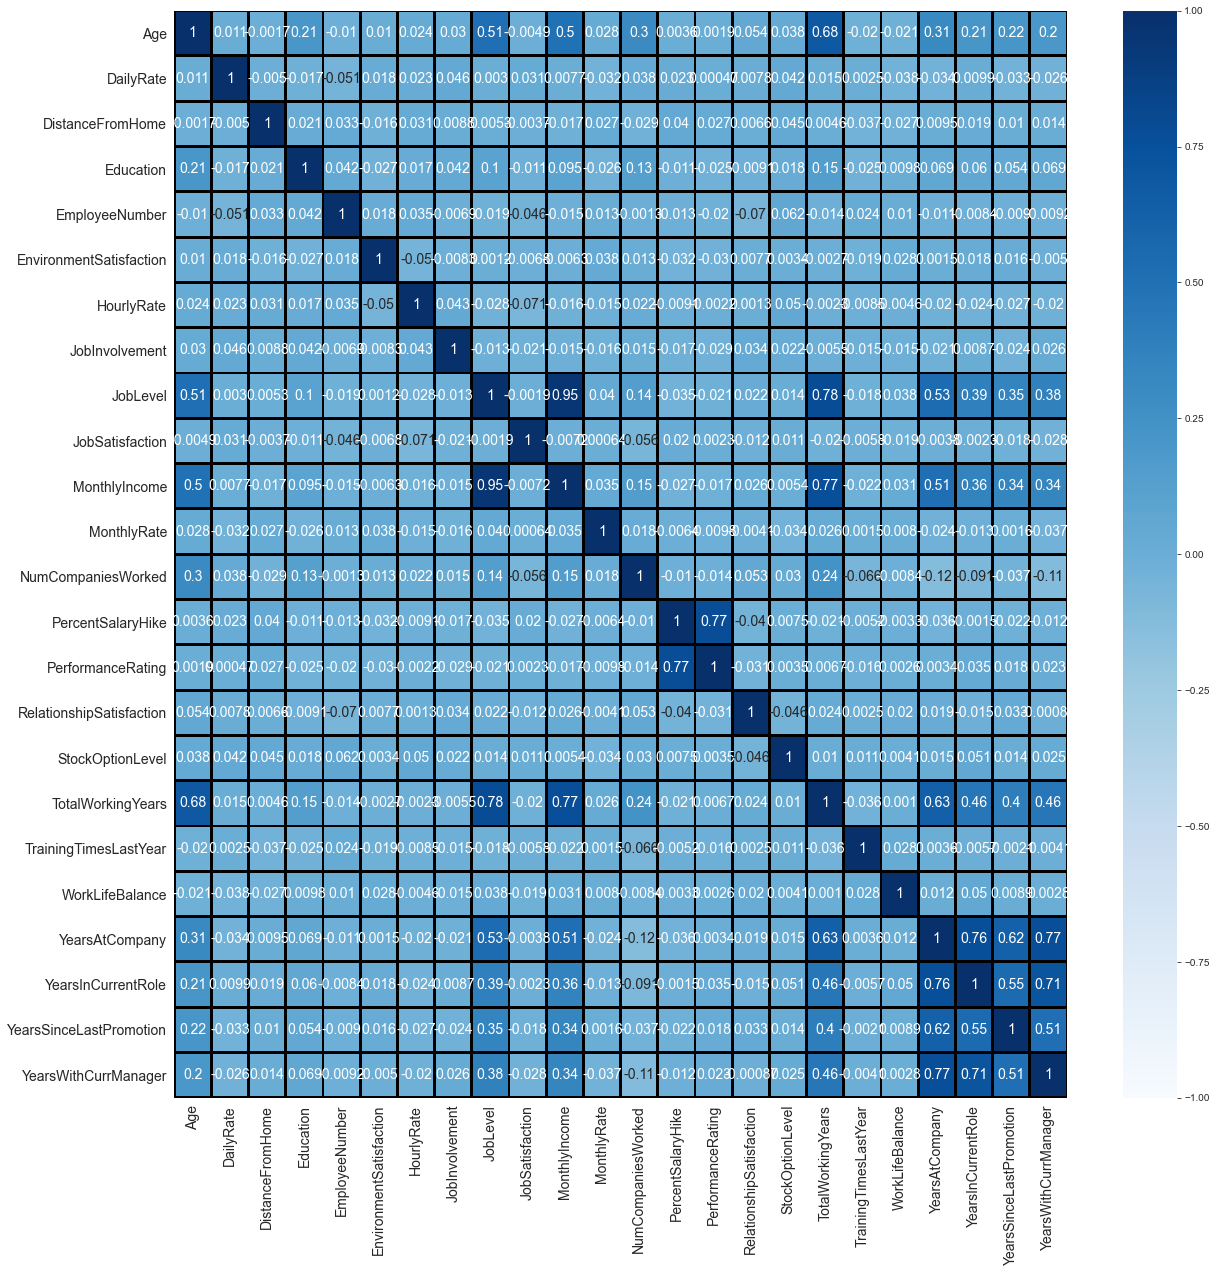

In [16]:
# plot a heatmap
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, annot_kws={"size":14}, vmin=-1, vmax=1, center=0, cmap='Blues',linewidths=2, linecolor='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [17]:
# obtain and display value_counts for dependent variable 'Attrition'
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

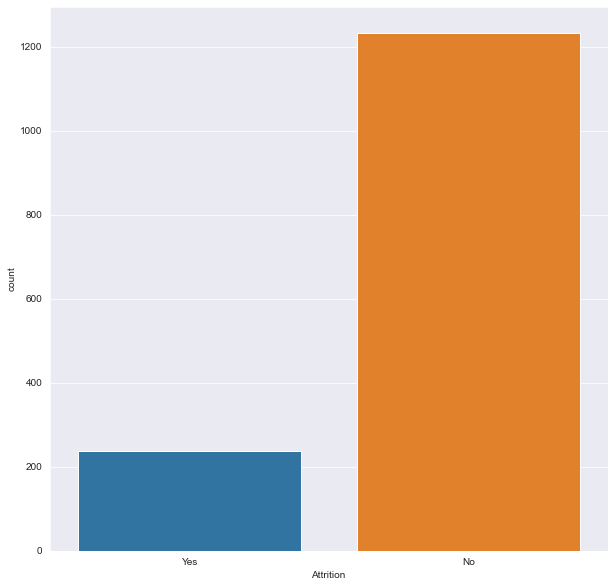

In [18]:
# plot a countplot for dependent variable 'Attrition'
rcParams['figure.figsize'] = 10, 10
sns.countplot(x='Attrition', data=df)
plt.show()

### Uncovering Significant Factors

In [19]:
# create a copy
cdf=df.copy()
cdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [20]:
# replace strings with values
cdf['Attrition'] = cdf['Attrition'].replace({'Yes': 0, 'No': 1})
cdf['BusinessTravel'] = cdf['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2})
cdf['Department'] = cdf['Department'].replace({'Human Resources': 0, 'Sales': 1, 'Research & Development': 2})
cdf['EducationField'] = cdf['EducationField'].replace({'Human Resources': 0, 'Other': 1, 'Technical Degree': 2, 'Marketing': 3, 'Medical': 4, 'Life Sciences': 5})   
cdf['Gender'] = cdf['Gender'].replace({'Female': 0, 'Male': 1})
cdf['JobRole'] = cdf['JobRole'].replace({'Human Resources': 0, 'Research Director': 1, 'Sales Representative': 2, 'Manager': 3, 'Healthcare Representative': 4, 'Manufacturing Director': 5, 'Laboratory Technician': 6, 'Research Scientist': 7, 'Sales Executive': 8})   
cdf['MaritalStatus'] = cdf['MaritalStatus'].replace({'Divorced': 0, 'Single': 1, 'Married': 2})
cdf['OverTime'] = cdf['OverTime'].replace({'Yes': 0, 'No': 1})
cdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,2,1102,1,1,2,5,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,2,8,1,5,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,0,2,1373,2,2,2,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,2,3,4,5,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,591,2,2,1,4,7,1,...,3,4,1,6,3,3,2,2,2,2


In [21]:
cdf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
# use logit model
from statsmodels.formula.api import logit

results = logit('Attrition ~  Age + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + EmployeeNumber + EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=cdf).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.321071
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                           31
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.2731
Time:                        22:36:53   Log-Likelihood:                -471.97
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.292e-56
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.6715      1.320     -5.811      0.000     -10.259      -5.084
Age                          0.0330      0.013      2.550      0.011       0.008       0.058
BusinessTravel               0.0002      0.130      0.001      0.999      -0.254       0.254
DailyRate                    0.0003      0.000      1.551      0.121   -8.48e-05       0.001
Department                   0.4760      0.157      3.024      0.002       0.167       0.784
DistanceFromHome            -0.0378      0.010     -3.683      0.000      -0.058      -0.018
Education                   -0.0198      0.083     -0.239      0.811      -0.182       0.143
EducationField               0.0885      0.066      1.334      0.182      -0.042       0.219
EmployeeNumber               0.0001      0.000      0.902      0.367      -0.000       0.000
EnvironmentSatisfaction      0.3923      0.078      4.998      0.000       0.238       0.546
Gender                      -0.3609      0.175     -2.058      0.040      -0.705      -0.017
HourlyRate                   0.0001      0.004      0.036      0.971      -0.008       0.008
JobInvolvement               0.5172      0.116      4.462      0.000       0.290       0.744
JobLevel                     0.2303      0.278      0.828      0.408      -0.315       0.776
JobRole                      0.0044      0.039      0.113      0.910      -0.072       0.081
JobSatisfaction              0.3511      0.077      4.583      0.000       0.201       0.501
MaritalStatus                0.0356      0.113      0.314      0.753      -0.186       0.257
MonthlyIncome             5.879e-05   6.69e-05      0.879      0.379   -7.23e-05       0.000
MonthlyRate              -5.881e-06   1.19e-05     -0.496      0.620   -2.91e-05    1.74e-05
NumCompaniesWorked          -0.1730      0.036     -4.820      0.000      -0.243      -0.103
OverTime                     1.7970      0.180     10.008      0.000       1.445       2.149
PercentSalaryHike            0.0371      0.037      1.011      0.312      -0.035       0.109
PerformanceRating           -0.2203      0.374     -0.589      0.556      -0.953       0.512
RelationshipSatisfaction     0.2659      0.079      3.364      0.001       0.111       0.421
StockOptionLevel             0.5752      0.112      5.141      0.000       0.356       0.795
TotalWorkingYears            0.0510      0.027      1.861      0.063      -0.003       0.105
TrainingTimesLastYear        0.1173      0.068      1.725      0.085      -0.016       0.251
WorkLifeBalance              0.2858      0.115      2.495      0.013       0.061       0.510
YearsAtCompany              -0.0817      0.036     -2.258      0.024      -0.153      -0.011
YearsInCurrentRole           0.1380      0.043      3.184      0.001       0.053       0.223
YearsSinceLastPromotion     -0.1642      0.040     -4.086      0.000      -0.243      -0.085
YearsWithCurrManager         0.1213      0.044      2.766      0.006       0.03

In [23]:
# drop columns
cdf.drop(columns=['BusinessTravel', 'DailyRate', 'Education', 'EducationField', 'EmployeeNumber',
                 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 
                 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear'], inplace=True)

In [24]:
cdf.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
# use logit model
from statsmodels.formula.api import logit

results = logit('Attrition ~  Age + Department + DistanceFromHome + EnvironmentSatisfaction + Gender + JobInvolvement + JobSatisfaction + NumCompaniesWorked + OverTime + RelationshipSatisfaction + StockOptionLevel + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=cdf).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.333990
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                           16
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.2438
Time:                        22:36:53   Log-Likelihood:                -490.97
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.997e-58
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -6.9195      0.758     -9.133      0.000      -8.404      -5.435
Age                          0.0643      0.011      5.903      0.000       0.043       0.086
Department                   0.4678      0.136      3.441      0.001       0.201       0.734
DistanceFromHome            -0.0332      0.010     -3.349      0.001      -0.053      -0.014
EnvironmentSatisfaction      0.3560      0.076      4.714      0.000       0.208       0.504
Gender                      -0.3663      0.171     -2.147      0.032      -0.701      -0.032
JobInvolvement               0.5014      0.113      4.454      0.000       0.281       0.722
JobSatisfaction              0.3387      0.074      4.580      0.000       0.194       0.484
NumCompaniesWorked          -0.1346      0.034     -3.959      0.000      -0.201      -0.068
OverTime                     1.7474      0.174     10.059      0.000       1.407       2.088
RelationshipSatisfaction     0.2265      0.076      2.963      0.003       0.077       0.376
StockOptionLevel             0.5619      0.109      5.142      0.000       0.348       0.776
WorkLifeBalance              0.2924      0.112      2.616      0.009       0.073       0.511
YearsAtCompany              -0.0047      0.031     -0.152      0.879      -0.065       0.055
YearsInCurrentRole           0.1205      0.042      2.897      0.004       0.039       0.202
YearsSinceLastPromotion     -0.1506      0.038     -3.925      0.000      -0.226      -0.075
YearsWithCurrManager         0.1063      0.043      2.497      0.013       0.023       0.190
============================================================================================
"""

In [26]:
# drop columns
cdf.drop(columns=['YearsAtCompany'], inplace=True)

In [27]:
cdf.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
# use logit model
from statsmodels.formula.api import logit

results = logit('Attrition ~  Age + Department + DistanceFromHome + EnvironmentSatisfaction + Gender + JobInvolvement + JobSatisfaction + NumCompaniesWorked + OverTime + RelationshipSatisfaction + StockOptionLevel + WorkLifeBalance + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=cdf).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.333998
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1454
Method:                           MLE   Df Model:                           15
Date:                Fri, 23 Jul 2021   Pseudo R-squ.:                  0.2438
Time:                        22:36:53   Log-Likelihood:                -490.98
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.941e-58
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -6.9159      0.757     -9.133      0.000      -8.400      -5.432
Age                          0.0639      0.011      6.019      0.000       0.043       0.085
Department                   0.4687      0.136      3.450      0.001       0.202       0.735
DistanceFromHome            -0.0331      0.010     -3.347      0.001      -0.053      -0.014
EnvironmentSatisfaction      0.3562      0.076      4.717      0.000       0.208       0.504
Gender                      -0.3668      0.171     -2.151      0.032      -0.701      -0.033
JobInvolvement               0.5024      0.112      4.470      0.000       0.282       0.723
JobSatisfaction              0.3382      0.074      4.579      0.000       0.193       0.483
NumCompaniesWorked          -0.1341      0.034     -3.965      0.000      -0.200      -0.068
OverTime                     1.7473      0.174     10.059      0.000       1.407       2.088
RelationshipSatisfaction     0.2262      0.076      2.961      0.003       0.076       0.376
StockOptionLevel             0.5621      0.109      5.144      0.000       0.348       0.776
WorkLifeBalance              0.2925      0.112      2.618      0.009       0.074       0.512
YearsInCurrentRole           0.1181      0.039      3.061      0.002       0.042       0.194
YearsSinceLastPromotion     -0.1531      0.035     -4.426      0.000      -0.221      -0.085
YearsWithCurrManager         0.1033      0.038      2.717      0.007       0.029       0.178
============================================================================================
"""

### Model Fitting 

In [29]:
# drop columns
df.drop(columns=['BusinessTravel', 'DailyRate', 'Education', 'EducationField', 'EmployeeNumber',
                 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 
                 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany'], inplace=True)

In [30]:
# view the first 5 lines
df.head()

,Age,Attrition,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Female,3,4,8,Yes,1,0,1,4,0,5
1,49,No,Research & Development,8,3,Male,2,2,1,No,4,1,3,7,1,7
2,37,Yes,Research & Development,2,4,Male,2,3,6,Yes,2,0,3,0,0,0
3,33,No,Research & Development,3,4,Female,3,3,1,Yes,3,0,3,7,3,0
4,27,No,Research & Development,2,1,Male,3,2,9,No,4,1,3,2,2,2


In [31]:
# replace strings with values
df['Attrition'] = df['Attrition'].replace({'Yes': 0, 'No': 1})
df['Department'] = df['Department'].replace({'Human Resources': 0, 'Sales': 1, 'Research & Development': 2})
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['OverTime'] = df['OverTime'].replace({'Yes': 0, 'No': 1})
df.head()

,Age,Attrition,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1,1,2,0,3,4,8,0,1,0,1,4,0,5
1,49,1,2,8,3,1,2,2,1,1,4,1,3,7,1,7
2,37,0,2,2,4,1,2,3,6,0,2,0,3,0,0,0
3,33,1,2,3,4,0,3,3,1,0,3,0,3,7,3,0
4,27,1,2,2,1,1,3,2,9,1,4,1,3,2,2,2


In [32]:
# separate features and target value
y=df['Attrition']
X=df.drop('Attrition',axis=1)

In [33]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# perform oversampling using SMOTE since imbalanced data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(1724, 15) (1724,)


In [35]:
# perform normalization
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
# use Logistic Regression model
model = LogisticRegression()

In [37]:
# perform stratified 5-fold cross validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#scores = cross_val_score(model, X_train, y_train, cv=cv)
#scores.mean()

In [38]:
# define parameters
# perform hyperparameters tuning 
# perform grid search cross validation
solvers =  ['lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', None]
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
grid = dict(solver=solvers,penalty=penalty,C=C)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gridsearch = GridSearchCV(estimator=model, cv=cv, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [39]:
# create a dataframe
df = pd.DataFrame(gridsearch.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.000000,0.000000e+00,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43
1,0.008537,0.005091,0.010301,8.575417e-03,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.498551,0.498551,0.501449,0.501449,0.500000,0.500000,0.001296,42
2,0.002286,0.001216,0.000000,0.000000e+00,0.001,l1,sag,"{'C': 0.001, 'penalty': 'l1', 'solver': 'sag'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43
3,0.012023,0.001897,0.015732,7.178863e-03,0.001,l1,saga,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.501449,0.501449,0.501449,0.501449,0.500000,0.501159,0.000580,41
4,0.025901,0.006376,0.002000,4.909339e-07,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.805797,0.802899,0.826087,0.800000,0.822674,0.811491,0.010737,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.025009,0.007640,0.000000,0.000000e+00,1000,l2,saga,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}",0.849275,0.860870,0.855072,0.849275,0.831395,0.849178,0.009876,2
80,0.008239,0.007050,0.000000,0.000000e+00,1000,None,lbfgs,"{'C': 1000, 'penalty': None, 'solver': 'lbfgs'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43
81,0.000000,0.000000,0.000000,0.000000e+00,1000,None,liblinear,"{'C': 1000, 'penalty': None, 'solver': 'liblin...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43
82,0.003125,0.006249,0.000000,0.000000e+00,1000,None,sag,"{'C': 1000, 'penalty': None, 'solver': 'sag'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43


In [40]:
# extract key results
df[['param_C','param_penalty', 'param_solver', 'mean_test_score']]

,param_C,param_penalty,param_solver,mean_test_score
0,0.001,l1,lbfgs,0.000000
1,0.001,l1,liblinear,0.500000
2,0.001,l1,sag,0.000000
3,0.001,l1,saga,0.501159
4,0.001,l2,lbfgs,0.811491
...,...,...,...,...
79,1000,l2,saga,0.849178
80,1000,None,lbfgs,0.000000
81,1000,None,liblinear,0.000000
82,1000,None,sag,0.000000


In [41]:
print(gridsearch.best_estimator_)

LogisticRegression(C=1, solver='liblinear')


In [42]:
print((gridsearch.best_score_, gridsearch.best_params_))

(0.8503387259858444, {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'})


In [43]:
# perform model fitting using train set
model = LogisticRegression(C = 1, penalty= 'l2', solver= 'liblinear')
model.fit(X_train, y_train)
# predict using the test set
y_pred=model.predict(X_test)

In [44]:
# calculate accuracy score
accuracy_score(y_test,y_pred)

0.8276643990929705

In [45]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 44,  26],
       [ 50, 321]], dtype=int64)

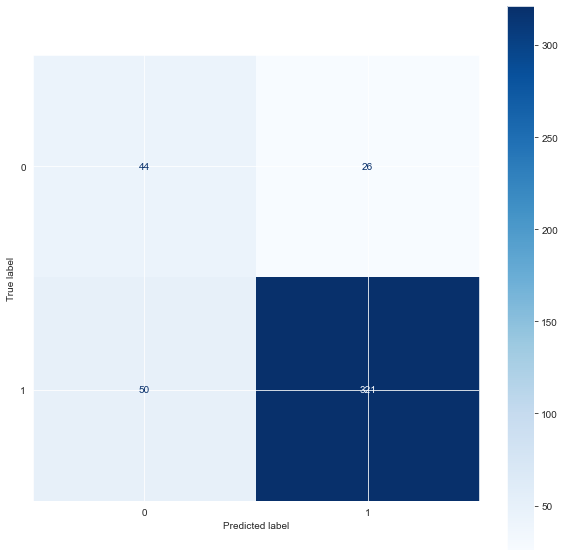

In [46]:
# plot a confusion matrix
rcParams['figure.figsize'] = 10, 10
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

In [47]:
# classification report
matrix=classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.47      0.63      0.54        70
           1       0.93      0.87      0.89       371

    accuracy                           0.83       441
   macro avg       0.70      0.75      0.72       441
weighted avg       0.85      0.83      0.84       441



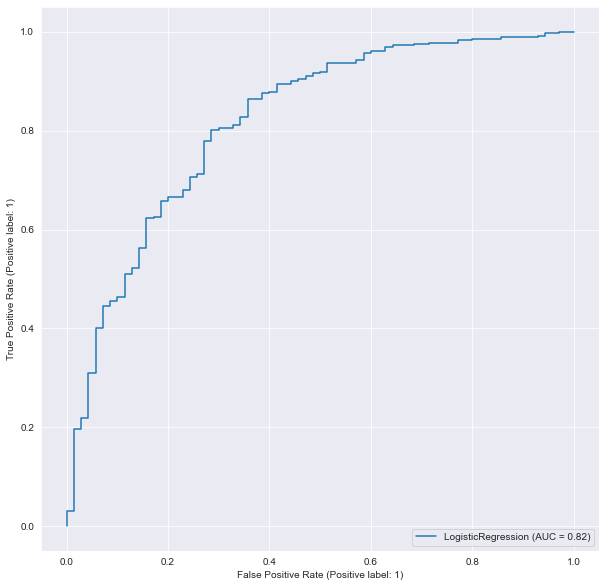

In [48]:
# plot ROC curve
metrics.plot_roc_curve(model, X_test, y_test);

> 0 = Resign <br>
> 1 = Stay <br>

> TN: 44 (Predicted: Resign and Actual: Resign) <br>
> FP: 26 (Predicted: Stay and Actual: Resign) <br>
> FN: 50 (Predicted: Resign and Actual: Stay) <br>
> TP: 321 (Predicted: Stay and Actual: Stay) <br>

### Conclusion to Business Question 1
### Significant Factors
> Age <br>
> Department <br>
> Distance From Home <br>
> Environment Satisfaction <br>
> Gender <br>
> Job Involvement <br>
> Job Satisfaction <br>
> Num Companies Worked <br>
> OverTime <br>
> Relationship Satisfaction <br>
> Stock Option Level <br>
> Work Life Balance <br>
> Years In CurrentRole <br>
> Years Since Last Promotion <br>
> Years With Curr Manager <br>

### Business Question 2 - Linear Regression

In [49]:
# read from csv and create a dataframe
# view the first 5 lines
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
# drop columns with only 1 unique value 
df.drop(columns=['EmployeeCount','Over18','StandardHours'] , inplace=True)

### Uncovering Significant Factors

In [51]:
# create a copy
cdf=df.copy()
cdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [52]:
# replace strings with values
cdf['Attrition'] = cdf['Attrition'].replace({'Yes': 0, 'No': 1})
cdf['BusinessTravel'] = cdf['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2})
cdf['Department'] = cdf['Department'].replace({'Human Resources': 0, 'Sales': 1, 'Research & Development': 2})
cdf['EducationField'] = cdf['EducationField'].replace({'Human Resources': 0, 'Other': 1, 'Technical Degree': 2, 'Marketing': 3, 'Medical': 4, 'Life Sciences': 5})   
cdf['Gender'] = cdf['Gender'].replace({'Female': 0, 'Male': 1})
cdf['JobRole'] = cdf['JobRole'].replace({'Human Resources': 0, 'Research Director': 1, 'Sales Representative': 2, 'Manager': 3, 'Healthcare Representative': 4, 'Manufacturing Director': 5, 'Laboratory Technician': 6, 'Research Scientist': 7, 'Sales Executive': 8})   
cdf['MaritalStatus'] = cdf['MaritalStatus'].replace({'Divorced': 0, 'Single': 1, 'Married': 2})
cdf['OverTime'] = cdf['OverTime'].replace({'Yes': 0, 'No': 1})
cdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,2,1102,1,1,2,5,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,2,8,1,5,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,0,2,1373,2,2,2,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,2,3,4,5,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,1,2,591,2,2,1,4,7,1,...,3,4,1,6,3,3,2,2,2,2


In [53]:
cdf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [54]:
# plot a correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [55]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each independent variable
# VIF dataframe
y, X = dmatrices('MonthlyIncome ~  Age + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + EmployeeNumber + EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=cdf, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

# a value of 1 indicates there is no correlation between dependent and independent variables
# a value between 1 and 5 indicates moderate correlation between dependent and independent variables
# a value greater than 5 indicates potentially high correlation between dependent and independent variables # in this case, the coefficient estimates and p-values in the regression output are likely unreliable

,VIF,variable
0,241.805974,Intercept
1,2.062675,Age
2,1.267350,Attrition
3,1.018698,BusinessTravel
4,1.023310,DailyRate
5,1.115965,Department
6,1.023234,DistanceFromHome
7,1.066871,Education
8,1.090885,EducationField
9,1.028255,EmployeeNumber


In [56]:
# use ols model
from statsmodels.formula.api import ols
results = ols('MonthlyIncome ~  Age + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + EmployeeNumber + EnvironmentSatisfaction + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager', data=cdf).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     501.6
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:37:04   Log-Likelihood:                -12702.
No. Observations:                1470   AIC:                         2.547e+04
Df Residuals:                    1438   BIC:                         2.564e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -697.8230    561.512     -1.243      0.214   -1799.293     403.647
Age                         -9.3233      5.679     -1.642      0.101     -20.463       1.816
Attrition                   42.2209    110.544      0.382      0.703    -174.624     259.066
BusinessTravel              83.1279     54.787      1.517      0.129     -24.343     190.599
DailyRate                    0.0425      0.091      0.469      0.639      -0.135       0.220
Department                 224.7038     67.076      3.350      0.001      93.126     356.281
DistanceFromHome           -10.4782      4.507     -2.325      0.020     -19.320      -1.637
Education                    5.2758     36.430      0.145      0.885     -66.186      76.737
EducationField               8.2940     29.255      0.284      0.777     -49.093      65.681
EmployeeNumber               0.0266      0.061      0.438      0.662      -0.093       0.146
EnvironmentSatisfaction    -31.8985     33.684     -0.947      0.344     -97.974      34.177
Gender                      71.5495     74.364      0.962      0.336     -74.323     217.423
HourlyRate                   2.2642      1.796      1.260      0.208      -1.259       5.788
JobInvolvement             -23.0800     51.684     -0.447      0.655    -124.464      78.304
JobLevel                  3711.9914     54.409     68.224      0.000    3605.262    3818.721
JobRole                   -183.8126     16.680    -11.020      0.000    -216.531    -151.094
JobSatisfaction             -9.7758     33.338     -0.293      0.769     -75.173      55.621
MaritalStatus               39.9720     46.372      0.862      0.389     -50.992     130.936
MonthlyRate                 -0.0014      0.005     -0.276      0.783      -0.011       0.009
NumCompaniesWorked           9.7950     16.363      0.599      0.550     -22.303      41.893
OverTime                   -80.6762     84.463     -0.955      0.340    -246.360      85.007
PercentSalaryHike            9.0825     15.681      0.579      0.563     -21.678      39.843
PerformanceRating          -52.4756    158.858     -0.330      0.741    -364.093     259.142
RelationshipSatisfaction    17.8750     33.939      0.527      0.598     -48.700      84.450
StockOptionLevel           -24.6494     43.518     -0.566      0.571    -110.015      60.716
TotalWorkingYears           47.4307     10.133      4.681      0.000      27.554      67.307
TrainingTimesLastYear      -11.9951     28.323     -0.424      0.672     -67.554      43.564
WorkLifeBalance            -33.0591     51.797     -0.638      0.523    -134.664      68.546
YearsAtCompany              12.4906     12.658      0.987      0.324     -12.340      37.321
YearsInCurrentRole         -10.2920     16.504     -0.624      0.533     -42.666      22.083
YearsSinceLast

In [57]:
# drop columns 
cdf.drop(columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Education', 'EducationField',
                 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 
                 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 
                 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'] , inplace=True)

In [58]:
cdf.columns

Index(['Department', 'DistanceFromHome', 'JobLevel', 'JobRole',
       'MonthlyIncome', 'TotalWorkingYears', 'YearsWithCurrManager'],
      dtype='object')

In [59]:
# use ols model
from statsmodels.formula.api import ols
results = ols('MonthlyIncome ~  Department + DistanceFromHome + JobLevel + JobRole + TotalWorkingYears + YearsWithCurrManager', data=cdf).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2604.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:37:04   Log-Likelihood:                -12711.
No. Observations:                1470   AIC:                         2.544e+04
Df Residuals:                    1463   BIC:                         2.547e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -829.0356    173.002     -4.792      0.000   -1168.394    -489.677
Department             226.9362     64.171      3.536      0.000     101.059     352.813
DistanceFromHome       -10.2558      4.448     -2.306      0.021     -18.981      -1.531
JobLevel              3714.9315     53.615     69.289      0.000    3609.762    3820.102
JobRole               -184.2824     16.474    -11.186      0.000    -216.598    -151.967
TotalWorkingYears       45.5356      7.829      5.816      0.000      30.179      60.893
YearsWithCurrManager   -28.2768     11.431     -2.474      0.013     -50.699      -5.854
==============================================================================
Omnibus:                       26.128   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.142
Skew:                          -0.067   Prob(JB):                     3.52e-11
Kurtosis:                       3.876   Cond. No.                         89.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Fitting 

In [60]:
# drop columns 
df.drop(columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Education', 'EducationField',
                 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 
                 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 
                 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'] , inplace=True)

In [61]:
# view the first 5 lines
df.head()

,Department,DistanceFromHome,JobLevel,JobRole,MonthlyIncome,TotalWorkingYears,YearsWithCurrManager
0,Sales,1,2,Sales Executive,5993,8,5
1,Research & Development,8,2,Research Scientist,5130,10,7
2,Research & Development,2,1,Laboratory Technician,2090,7,0
3,Research & Development,3,1,Research Scientist,2909,8,0
4,Research & Development,2,1,Laboratory Technician,3468,6,2


In [62]:
# replace strings with values
df['Department'] = df['Department'].replace({'Human Resources': 0, 'Sales': 1, 'Research & Development': 2})
df['JobRole'] = df['JobRole'].replace({'Human Resources': 0, 'Research Director': 1, 'Sales Representative': 2, 'Manager': 3, 'Healthcare Representative': 4, 'Manufacturing Director': 5, 'Laboratory Technician': 6, 'Research Scientist': 7, 'Sales Executive': 8})   
df.head()

,Department,DistanceFromHome,JobLevel,JobRole,MonthlyIncome,TotalWorkingYears,YearsWithCurrManager
0,1,1,2,8,5993,8,5
1,2,8,2,7,5130,10,7
2,2,2,1,6,2090,7,0
3,2,3,1,7,2909,8,0
4,2,2,1,6,3468,6,2


In [63]:
# separate features and target value
y=df['MonthlyIncome']
X=df.drop('MonthlyIncome',axis=1)

In [64]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
# perform normalization
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [66]:
# perform model fitting using train set
model = LinearRegression()
model.fit(X_train,y_train)
# predict using the test set
y_pred=model.predict(X_test)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('Root Mean Squared Error: \n', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared: \n', r2_score(y_test, y_pred))

Intercept: 
 2854.673799545721
Coefficients: 
 [  532.58765835  -402.83579757 15117.81629653 -1461.32490322
  1481.27270457  -433.71530938]
Root Mean Squared Error: 
 1326.9649872005261
R-squared: 
 0.917483985932447


###  Check for Normality of residuals

In [67]:
# residuals
residuals = y_test - y_pred

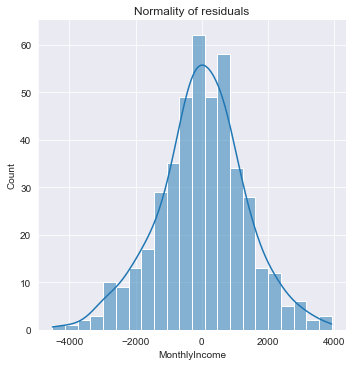

In [68]:
# plot a histogram
sns.displot(residuals, kde=True)
plt.title('Normality of residuals')
plt.show()

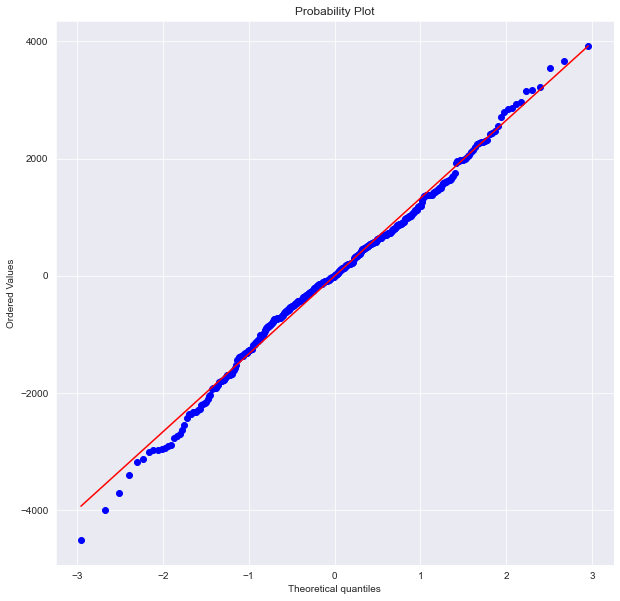

In [69]:
# plot a qqplot
from scipy import stats
res=stats.probplot(residuals, plot=plt)

In [70]:
# D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(residuals)         

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=4.97, p=0.08
Approximately Normally Distributed


### Comparison with different linear models

### Lasso Regression

In [71]:
from sklearn.linear_model import Lasso 
# perform model fitting using train set
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
# predict using the test set
y_pred_lasso = model_lasso.predict(X_test)
print('Intercept: \n', model_lasso.intercept_)
print('Coefficients: \n', model_lasso.coef_)
print('Root Mean Squared Error: \n', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R-squared: \n', r2_score(y_test, y_pred_lasso))

Intercept: 
 2859.5943318031173
Coefficients: 
 [  521.21334204  -392.09740338 15120.68931572 -1455.69073335
  1432.17124905  -391.32467139]
Root Mean Squared Error: 
 1326.9431993076334
R-squared: 
 0.9174866956276296


### Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
# perform model fitting using train set
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
# predict using the test set
y_pred_ridge = model_ridge.predict(X_test)
print('Intercept: \n', model_ridge.intercept_)
print('Coefficients: \n', model_ridge.coef_)
print('Root Mean Squared Error: \n', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R-squared: \n', r2_score(y_test, y_pred_ridge))

Intercept: 
 2904.443402463702
Coefficients: 
 [  493.26292752  -393.27337016 14680.75521761 -1504.42647173
  1878.70674148  -379.25335998]
Root Mean Squared Error: 
 1321.1665715297895
R-squared: 
 0.9182035479251497


### ElasticNet Regression

In [73]:
from sklearn.linear_model import ElasticNet
# perform model fitting using train set
model_elasticnet = ElasticNet()
model_elasticnet.fit(X_train,y_train)
# predict using the test set
y_pred_elasticnet = model_elasticnet.predict(X_test)
print('Intercept: \n', model_elasticnet.intercept_)
print('Coefficients: \n', model_elasticnet.coef_)
print('Root Mean Squared Error: \n', np.sqrt(mean_squared_error(y_test, y_pred_elasticnet)))
print('R-squared: \n', r2_score(y_test, y_pred_elasticnet))

Intercept: 
 6143.213122406976
Coefficients: 
 [ -92.66834968  -46.50787712 2024.07862666 -812.92207375 1107.30045999
  510.36224377]
Root Mean Squared Error: 
 3813.345342137957
R-squared: 
 0.3185537777620956


### Stochastic Gradient Descent Regression

In [74]:
from sklearn.linear_model import SGDRegressor
# perform model fitting using train set
model_sgd = SGDRegressor()
model_sgd.fit(X_train,y_train)
# predict using the test set
y_pred_sgd = model_sgd.predict(X_test)
print('Intercept: \n', model_sgd.intercept_)
print('Coefficients: \n', model_sgd.coef_)
print('Root Mean Squared Error: \n', np.sqrt(mean_squared_error(y_test, y_pred_sgd)))
print('R-squared: \n', r2_score(y_test, y_pred_sgd))

Intercept: 
 [2823.9147593]
Coefficients: 
 [  460.60911801  -391.33717428 14415.8886304  -1477.02409175
  2622.68053616  -584.50498819]
Root Mean Squared Error: 
 1319.0820935752145
R-squared: 
 0.9184614539285718


> Based on RMSE, Stochastic Gradient Descent Regression is the best model.<br>
> RMSE of Linear Regression:  1326.9649872005261 <br>
> RMSE of Lasso Regression: 1326.9431993076334 <br>
> RMSE of Ridge Regression:  1321.1665715297895 <br>
> RMSE of ElasticNet Regression: 3813.345342137957 <br>
> RMSE of Stochastic Gradient Descent Regression: 1319.0820935752145 <br>

### Conclusion to Business Question 2
### Significant Factors
> Department <br>
> Distance From Home <br>
> Job Level <br>
> Job Role <br>
> Total Working Years <br>
> Years With Curr Manager <br>